<a href="https://colab.research.google.com/github/umar736/myProjects/blob/master/text_mining_final_lab_viva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/TeleCustomers.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [15]:
X = df.drop(['custcat'], axis = 1)
y = df['custcat']
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.26


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification Report:')
print(classification_report(y_test, Pred_y))
print('Confusion Matrix:')
print(confusion_matrix(y_test, Pred_y))

Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.41      0.34        51
           2       0.30      0.27      0.29        44
           3       0.21      0.22      0.21        54
           4       0.24      0.14      0.17        51

    accuracy                           0.26       200
   macro avg       0.26      0.26      0.25       200
weighted avg       0.26      0.26      0.25       200

Confusion Matrix:
[[21  9 16  5]
 [10 12 14  8]
 [23 10 12  9]
 [19  9 16  7]]


In [19]:
accuracy = accuracy_score(y_test, Pred_y)
print(f'Accuracy: {accuracy}')

Accuracy: 0.26


In [23]:
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
z = mean_squared_error(y_test, Pred_y)
error = sqrt(mean_squared_error(y_test, Pred_y))
print("RMSE", error)

RMSE 1.5937377450509227


In [29]:
print(" F1 score:" + str(metrics.f1_score(y_test, Pred_y,average='weighted')))


 F1 score:0.25171025345622117


<Axes: >

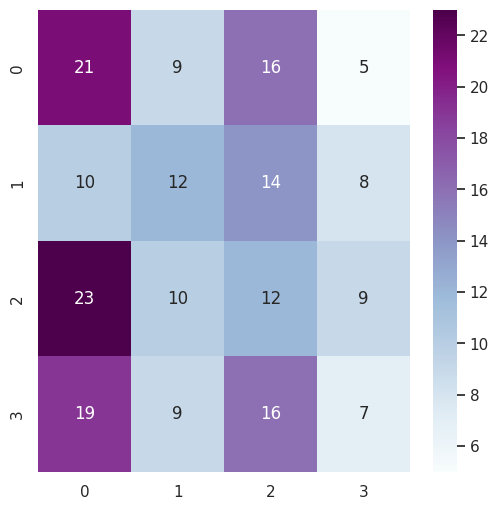

In [27]:
import seaborn as sns
sns.set()
matrix = confusion_matrix(y_test,Pred_y)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrix,annot=True,fmt='d',cmap="BuPu", ax=ax)

Starting Decision tree
Training time: 0.017012596130371094
Test time: 0.009453535079956055
Decision Tree, accuracy: 0.37 F1 score:0.3624025974025974


<Axes: >

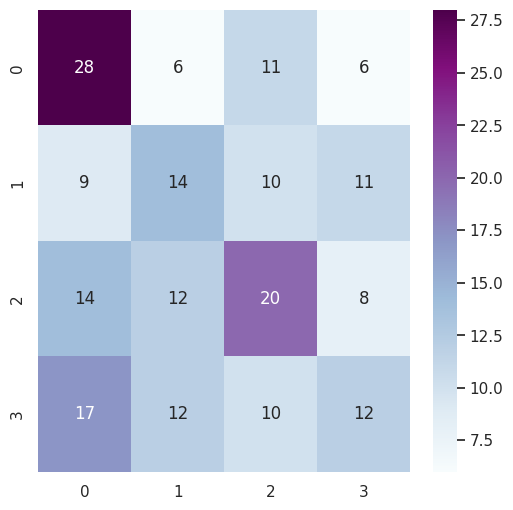

In [33]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()

print("Starting Decision tree")
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
end = time.time()
dt_diff=end-start
print("Training time: " + str(dt_diff))
starttest = time.time()
y_pred_dt = clf.predict(X_test)
train_pred_dt = clf.predict(X_train)
y_pred_dt_roc = clf.predict_proba(X_test)
endtest =time.time()
dt_difftest = endtest-starttest
print("Test time: " + str(dt_difftest))

'''z = mean_squared_error(y_test, y_pred_dt)
error = sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE", error)'''


print("Decision Tree, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_dt)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_dt,average='weighted')))
matrixdt = confusion_matrix(y_test,y_pred_dt)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrixdt,annot=True,fmt='d',cmap="BuPu", ax=ax)

[[215   0   0   0]
 [  0 173   0   0]
 [  0   0 227   0]
 [  0   0   0 185]]


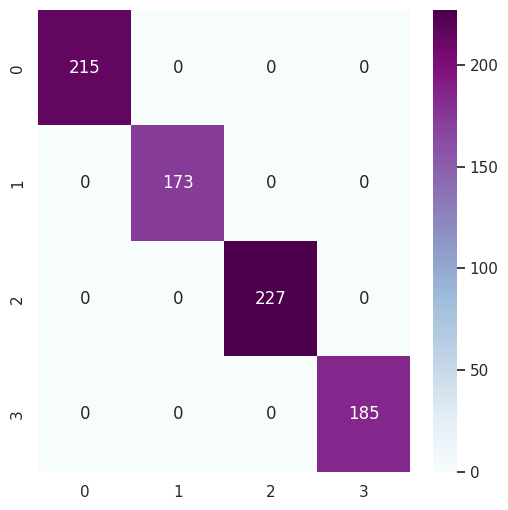

In [36]:
matrixdt = confusion_matrix(y_train,train_pred_dt)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrixdt,annot=True,fmt='d',cmap="BuPu", ax=ax)
print(matrixdt)


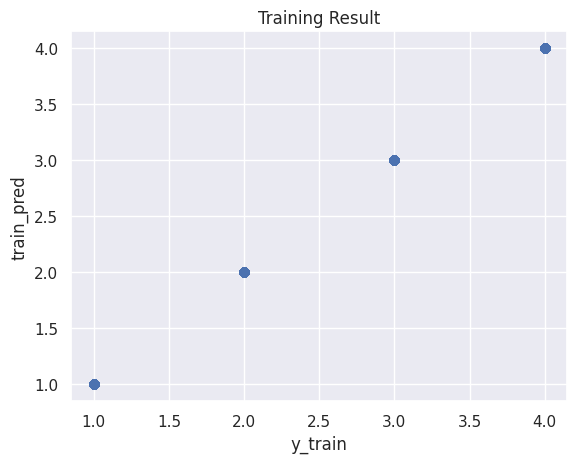

In [37]:
fig, ax = plt.subplots()
ax.scatter(y_train, train_pred_dt)
plt.xlabel('y_train')
plt.ylabel('train_pred')
plt.title('Training Result')
plt.show()

In [39]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
print("Starting Random forest")
seed = 7
classifier = RandomForestClassifier(verbose=2,random_state=seed)
classifier.fit(X_train, y_train)
end = time.time()
rf_diff=end-start
print("Training time: " + str(rf_diff))
starttest = time.time()
y_pred_random = classifier.predict(X_test)
train_pred_rf = classifier.predict(X_train)
endtest =time.time()
rf_difftest = endtest-starttest
print("Test time: " + str(rf_difftest))

Starting Random forest
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
bu

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


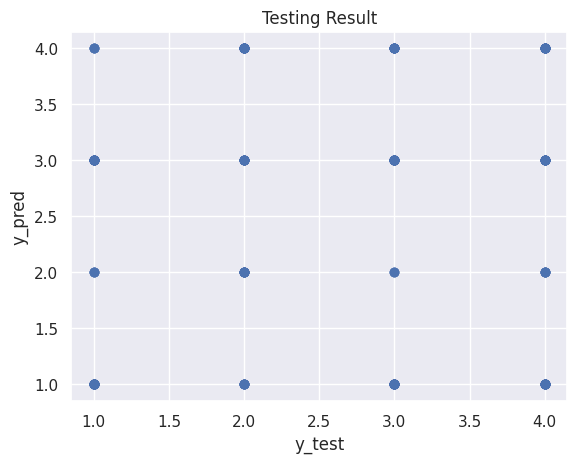

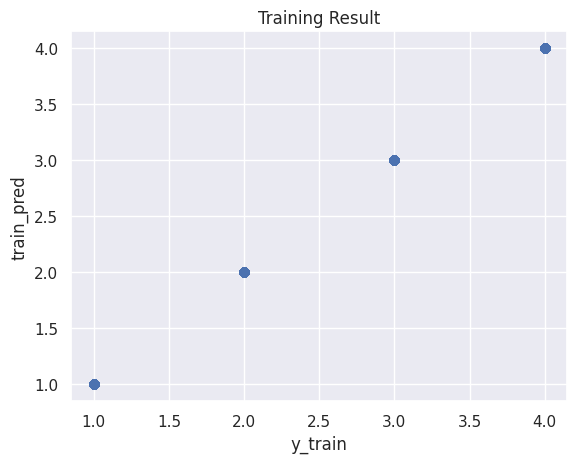

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_random)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Testing Result')
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_train, train_pred_rf)
plt.xlabel('y_train')
plt.ylabel('train_pred')
plt.title('Training Result')
plt.show()

Random Forest, accuracy: 0.375 F1 score:0.36517424242424246
[[27  4 16  4]
 [ 7  9 10 18]
 [18  3 23 10]
 [17  6 12 16]]


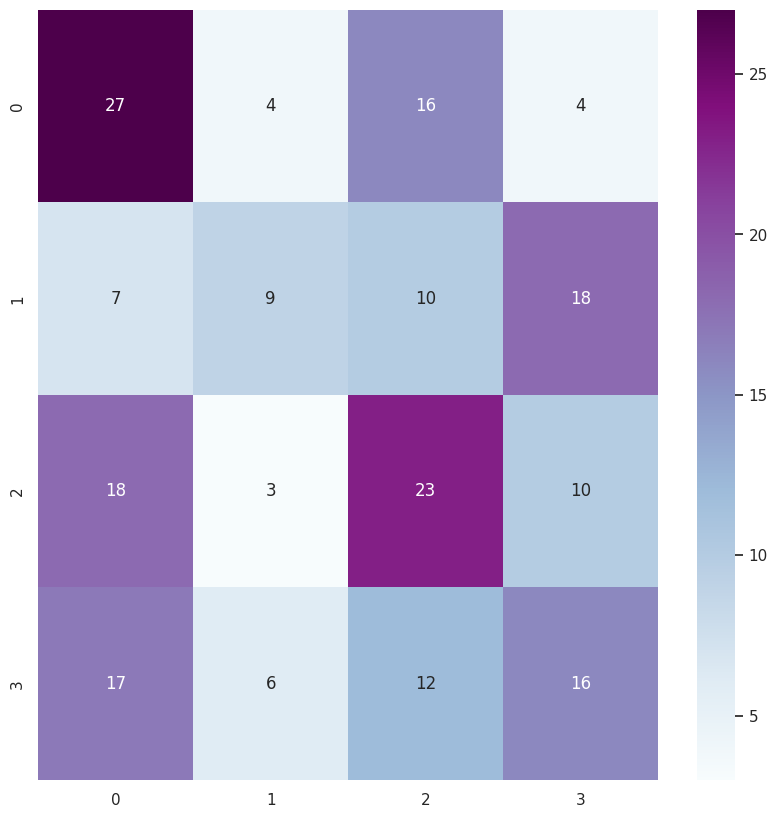

In [41]:
print("Random Forest, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_random)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_random,average='weighted')))
matrixrf = confusion_matrix(y_test,y_pred_random)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrixrf,annot=True,fmt='d',cmap="BuPu", ax=ax)
print(matrixrf)

In [42]:
#Create Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
import time
start = time.time()
print("Starting Naive Bayes")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nb = gnb.predict(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

Starting Naive Bayes
Training time: 0.01224660873413086
Test time: 0.009210824966430664


RMSE 1.6109003693587012


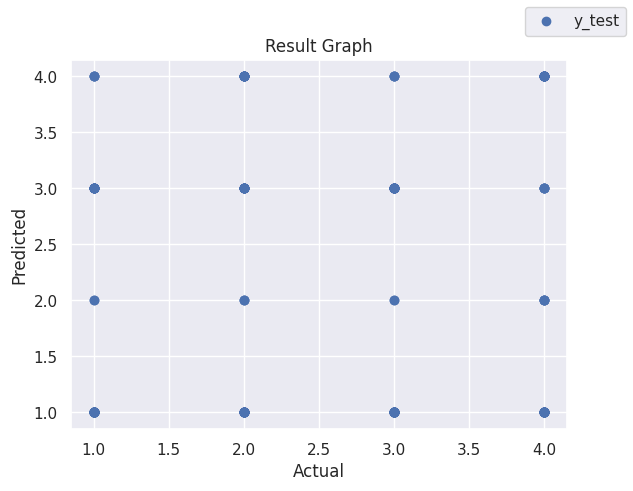

In [48]:
z = mean_squared_error(y_test, Pred_y)
error = sqrt(mean_squared_error(y_test, y_pred_nb))
print("RMSE", error)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_nb )

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Result Graph')
fig.legend(['y_test','y_pred_nb'])
plt.show()

Naive Bayes, accuracy: 0.365 F1 score:0.3376895990876885
[[33  2 12  4]
 [19  3 11 11]
 [28  2 20  4]
 [24  5  5 17]]


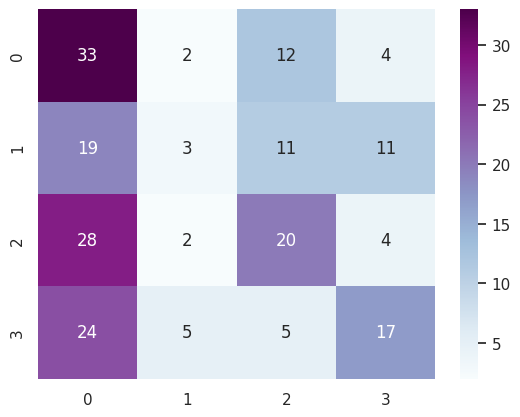

In [49]:
print("Naive Bayes, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_nb)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_nb,average='weighted')))
matrixnv = confusion_matrix(y_test,y_pred_nb)
sns.heatmap(matrixnv,annot=True,fmt='d',cmap="BuPu")
print(matrixnv)

Starting Multi layer perceptron
Iteration 1, loss = 7.52868050
Iteration 2, loss = 6.65906407
Iteration 3, loss = 5.93640302
Iteration 4, loss = 5.44823345
Iteration 5, loss = 5.17661197
Iteration 6, loss = 4.83252648
Iteration 7, loss = 4.41002461
Iteration 8, loss = 3.98682614
Iteration 9, loss = 3.68717660
Iteration 10, loss = 3.58211531
Iteration 11, loss = 3.60618802
Iteration 12, loss = 3.65410493
Iteration 13, loss = 3.64989415
Iteration 14, loss = 3.57239182
Iteration 15, loss = 3.43239671
Iteration 16, loss = 3.25540671
Iteration 17, loss = 3.07515753
Iteration 18, loss = 2.91680750


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 19, loss = 2.77862268
Iteration 20, loss = 2.66285268
Iteration 21, loss = 2.56605438
Iteration 22, loss = 2.48197734
Iteration 23, loss = 2.41334498
Iteration 24, loss = 2.36951081
Iteration 25, loss = 2.33078950
Iteration 26, loss = 2.28293235
Iteration 27, loss = 2.22614160
Iteration 28, loss = 2.16320256
Iteration 29, loss = 2.09736148
Iteration 30, loss = 2.03418601
Iteration 31, loss = 1.97669863
Iteration 32, loss = 1.92520593
Iteration 33, loss = 1.88253555
Iteration 34, loss = 1.85201470
Iteration 35, loss = 1.83263478
Iteration 36, loss = 1.81861541
Iteration 37, loss = 1.80283315
Iteration 38, loss = 1.78099004
Iteration 39, loss = 1.75407449
Iteration 40, loss = 1.72616299
Iteration 41, loss = 1.70170282
Iteration 42, loss = 1.68244362
Iteration 43, loss = 1.66754666
Iteration 44, loss = 1.65470865
Iteration 45, loss = 1.64255746
Iteration 46, loss = 1.63028066
Iteration 47, loss = 1.61729397
Iteration 48, loss = 1.60302454
Iteration 49, loss = 1.58723028
Iteratio

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


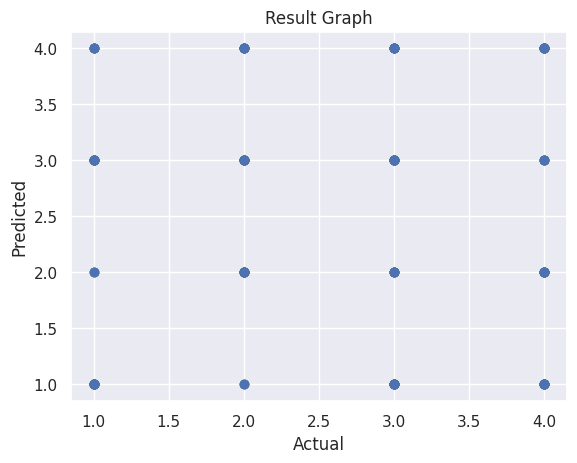

In [52]:
#Multi layer perceptron
from sklearn.neural_network import MLPClassifier
import time
seed = 7
start = time.time()
print("Starting Multi layer perceptron")
model = MLPClassifier( max_iter=130, batch_size=1000, alpha=1e-4, activation = 'relu',solver='adam', verbose=10, tol=1e-4, random_state=seed)
train_accuracy_mlp = model.fit(X_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
test_accuracy_mlp=y_pred_mlp = model.predict(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

z = mean_squared_error(y_test, y_pred_mlp)
error = sqrt(mean_squared_error(y_test, y_pred_mlp))
print("RMSE", error)

#fig, ax = plt.subplots()
plt.scatter(y_test, y_pred_mlp)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Result Graph')
plt.show()

MultiLayerPerceptron, accuracy: 0.4 F1 score:0.3986467606526216
[[24  3 18  6]
 [ 3 14 17 10]
 [15  7 23  9]
 [14 12  6 19]]


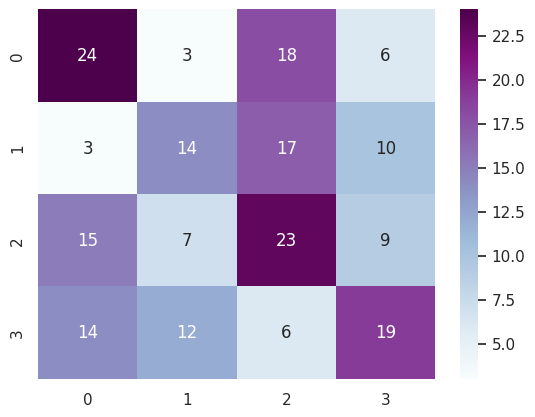

In [53]:
print("MultiLayerPerceptron, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_mlp)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_mlp,average='weighted')))
matrixml = confusion_matrix(y_test,y_pred_mlp)
sns.heatmap(matrixml,annot=True,fmt='d',cmap="BuPu")
print(matrixml)

Accuracy = 42.5 %
RMSE 1.547578754054216


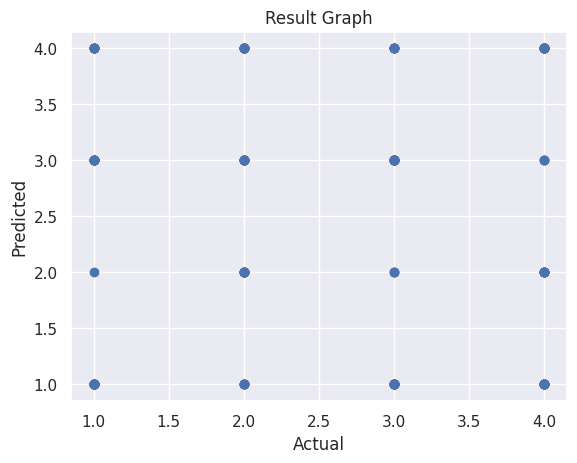

SVM, accuracy: 0.425 F1 score:0.41480186480186476
[[26  1 15  9]
 [ 6  9 12 17]
 [20  3 24  7]
 [14  8  3 26]]


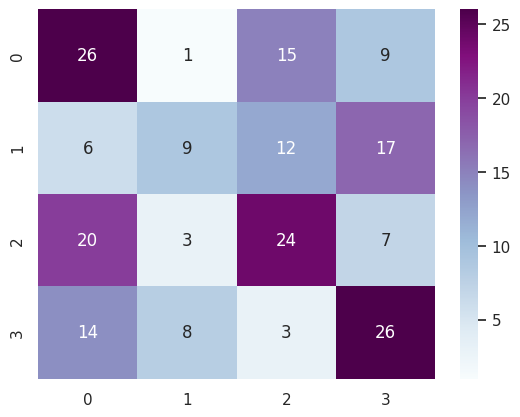

In [55]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy = {accuracy*100} %")

z = mean_squared_error(y_test, y_pred_svm)
error = sqrt(mean_squared_error(y_test, y_pred_svm))
print("RMSE", error)

plt.scatter(y_test, y_pred_svm)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Result Graph')
plt.show()

print("SVM, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_svm)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_svm,average='weighted')))
matrixnv = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(matrixnv,annot=True,fmt='d',cmap="BuPu")
print(matrixnv)